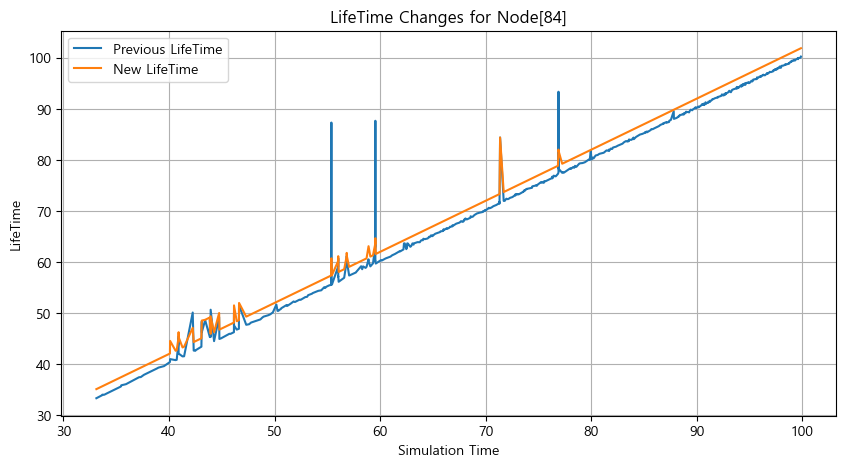

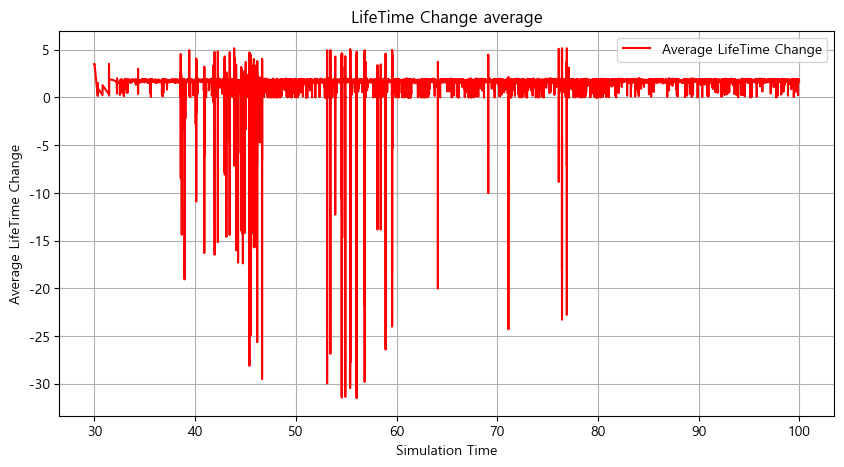

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import re

density_3 = '고밀도'
density_2 = '중밀도'
density_1 = '저밀도'

speed_3 = '고속'
speed_2 = '중속'
speed_1 = '저속'

mode_1 = '제안기법'
mode_2 = '기존'

file_path = "제안기법_원인분석_file/" + density_1 + "/" + speed_3 + "/" + mode_1 +"/6/aodv_routing_log.csv"

df = pd.read_csv(file_path)

df['Node'] = df['Node'].apply(lambda x: int(re.search(r'\[(\d+)\]', x).group(1)) if pd.notna(x) else -1)

node_id = 84
df_filtered = df[(df['Node'] == node_id) & (df['Time'] <= 100)]

plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Time'], df_filtered['Previous_LifeTime'], label='Previous LifeTime')
plt.plot(df_filtered['Time'], df_filtered['New_LifeTime'], label='New LifeTime', linestyle='-')
plt.xlabel('Simulation Time')
plt.ylabel('LifeTime')
plt.title(f'LifeTime Changes for Node[{node_id}]')
plt.legend()
plt.grid()
plt.show()

df['LifeTime_Change'] = df['New_LifeTime'] - df['Previous_LifeTime']
df_avg = df.groupby('Time')['LifeTime_Change'].mean()
df_avg = df_avg[df_avg.index <= 100]

plt.figure(figsize=(10, 5))
plt.plot(df_avg.index, df_avg.values, label='Average LifeTime Change', color='red')
plt.xlabel('Simulation Time')
plt.ylabel('Average LifeTime Change')
plt.title('LifeTime Change average')
plt.legend()
plt.grid()
plt.show()

In [15]:
import pandas as pd
import os
import re

density = '고밀도'
speed_list = ['고속']
mode_list = ['기존', '제안기법']
node_folders = [6, 7, 18, 21, 29, 33, 36, 44, 46]

data = []

for speed in speed_list:
    for mode in mode_list:
        base_path = f"제안기법_원인분석_file/{density}/{speed}/{mode}/"
        for node_id in node_folders:
            file_path = os.path.join(base_path, str(node_id), "aodv_routing_log.csv")

            print(f"로딩 중: {file_path}")

            if not os.path.exists(file_path):
                print(f"파일 없음: {file_path}")
                continue

            try:
                df = pd.read_csv(file_path, nrows=500)
            except Exception as e:
                print(f"파일 로딩 실패: {file_path}, 에러: {e}")
                continue

            def extract_node(x):
                match = re.search(r'\[(\d+)\]', str(x))
                return int(match.group(1)) if match else -1

            df['Node'] = df['Node'].apply(extract_node)

            df['LifeTime_Change'] = df['New_LifeTime'] - df['Previous_LifeTime']

            for row in df.itertuples(index=False):
                data.append([speed, mode, node_id, row.New_LifeTime, row.LifeTime_Change])

df_high_density = pd.DataFrame(data, columns=['Speed', 'Method', 'Node', 'LifeTime', 'LifeTime_Change'])

print("데이터 로딩 완료")


로딩 중: 제안기법_원인분석_file/고밀도/고속/기존/6\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/기존/7\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/기존/18\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/기존/21\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/기존/29\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/기존/33\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/기존/36\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/기존/44\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/기존/46\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/제안기법/6\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/제안기법/7\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/제안기법/18\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/제안기법/21\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/제안기법/29\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/제안기법/33\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/제안기법/36\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/제안기법/44\aodv_routing_log.csv
로딩 중: 제안기법_원인분석_file/고밀도/고속/제안기법/46\aodv_routing_log.

In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

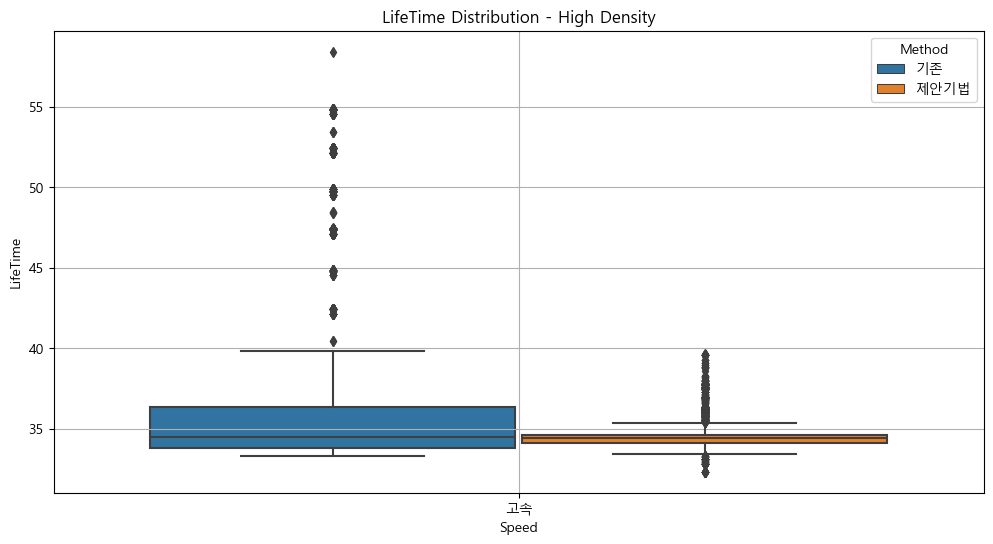

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x="Speed", y="LifeTime", hue="Method", data=df_high_density)
plt.xlabel("Speed")
plt.ylabel("LifeTime")
plt.title("LifeTime Distribution - High Density")
plt.legend(title="Method")
plt.grid(True)
plt.show()


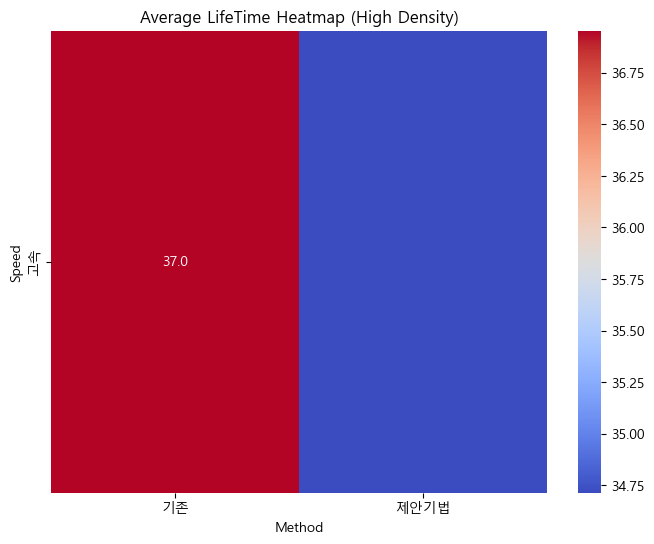

In [11]:
import numpy as np
import seaborn as sns

df_heatmap = df_high_density.groupby(["Speed", "Method"])["LifeTime"].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", fmt=".1f")
plt.xlabel("Method")
plt.ylabel("Speed")
plt.title("Average LifeTime Heatmap (High Density)")
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_28060\492227001.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Speed", y="LifeTime", hue="Method", data=df_high_density, ci="sd")


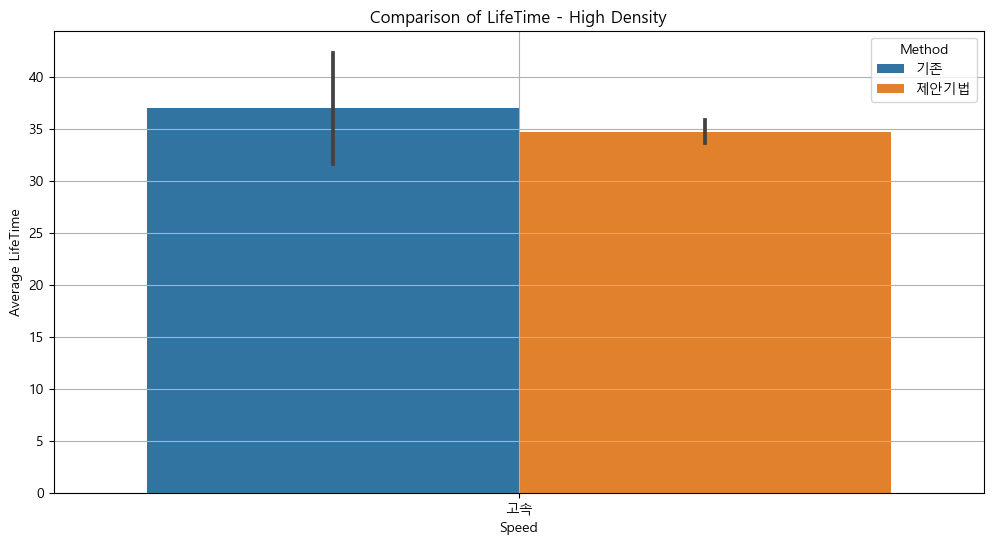

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Speed", y="LifeTime", hue="Method", data=df_high_density, ci="sd")
plt.xlabel("Speed")
plt.ylabel("Average LifeTime")
plt.title("Comparison of LifeTime - High Density")
plt.legend(title="Method")
plt.grid(True)
plt.show()


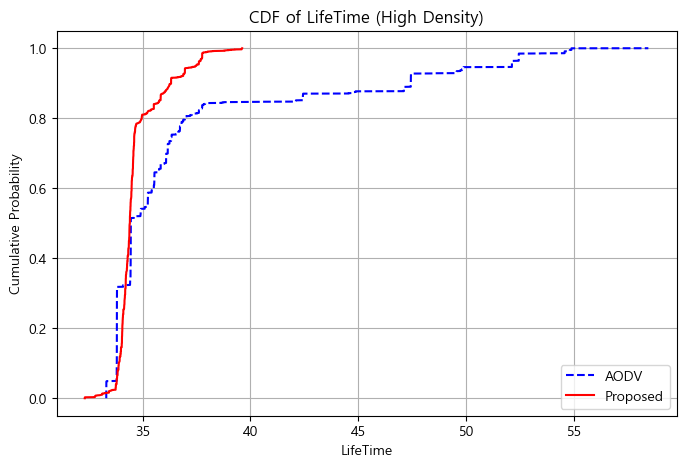

In [ ]:
import numpy as np

lifetime_aodv = df_high_density[df_high_density["Method"] == "기존"]["LifeTime"].values
lifetime_proposed = df_high_density[df_high_density["Method"] == "제안기법"]["LifeTime"].values

x_aodv = np.sort(lifetime_aodv)
y_aodv = np.arange(1, len(x_aodv) + 1) / len(x_aodv)

x_proposed = np.sort(lifetime_proposed)
y_proposed = np.arange(1, len(x_proposed) + 1) / len(x_proposed)

plt.figure(figsize=(8, 5))
plt.plot(x_aodv, y_aodv, label="AODV", linestyle="dashed", color="blue")
plt.plot(x_proposed, y_proposed, label="Proposed", linestyle="solid", color="red")
plt.xlabel("LifeTime")
plt.ylabel("Cumulative Probability")
plt.title("CDF of LifeTime (High Density)")
plt.legend()
plt.grid(True)
plt.show()
